# Removing unnecessary columns

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("employee.csv")
data.shape

(1470, 35)

In [ ]:
pd.set_option('display.max_columns', 35)
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [ ]:
data['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [ ]:
data['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [ ]:
data['StandardHours'].value_counts()

StandardHours
80    1470
Name: count, dtype: int64

In [ ]:
data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [ ]:
data['EmployeeNumber'].nunique()

1470

In [ ]:
data.drop(['EmployeeNumber'], axis=1, inplace=True)

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<AxesSubplot: >

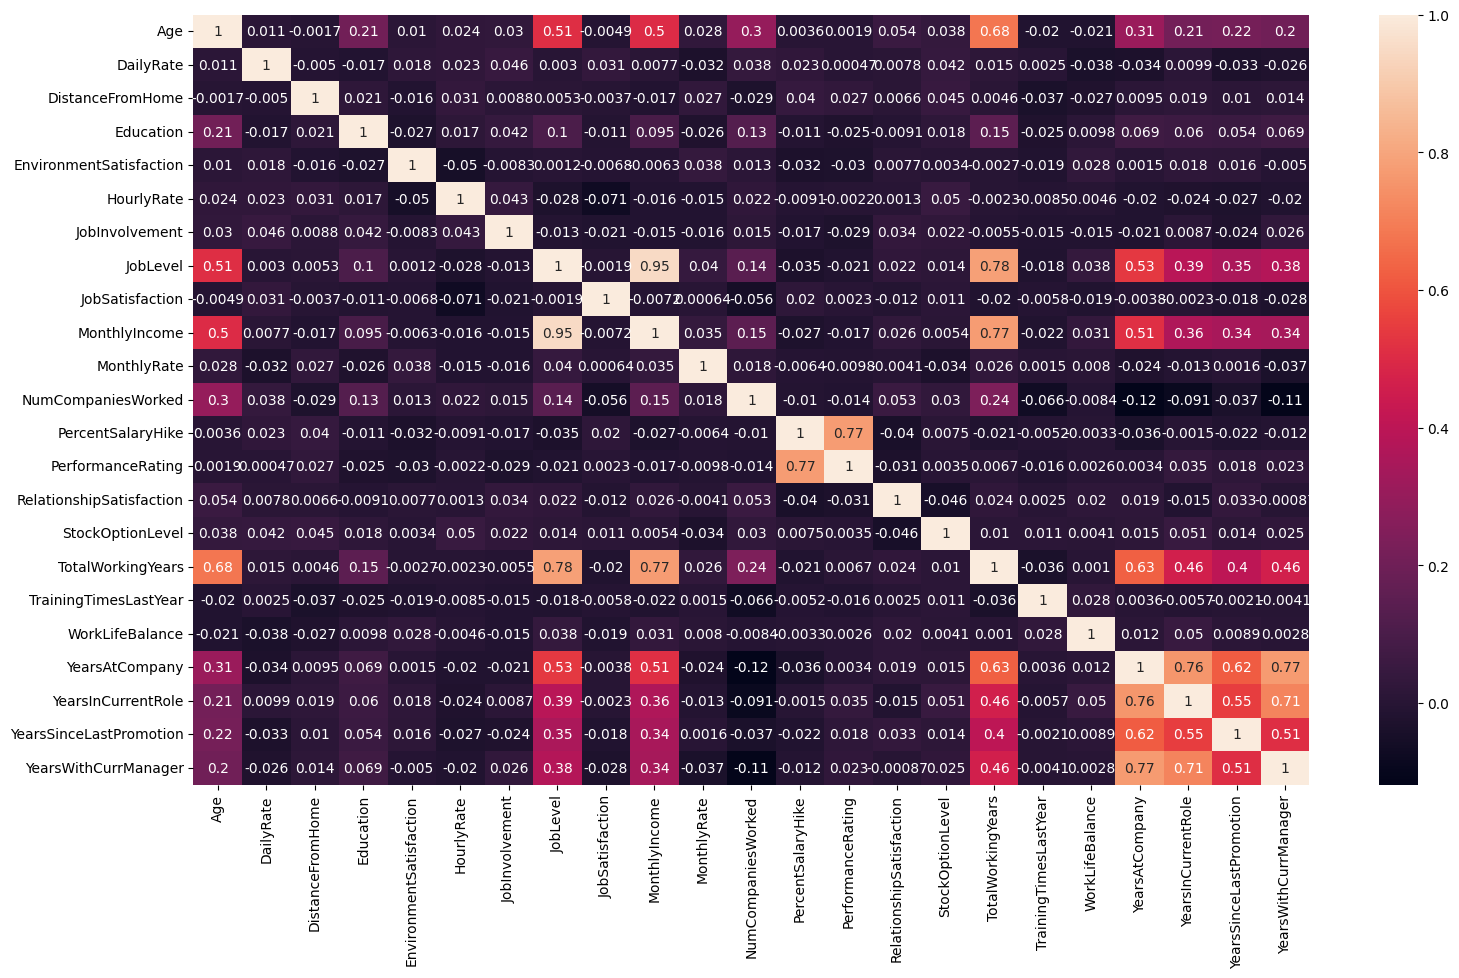

In [ ]:
# correlation among all the variables
plt.rcParams['figure.figsize'] = (18, 10)
data_nums = data.select_dtypes(exclude=['object'])
sns.heatmap(data_nums.corr(), annot=True)

Delete the highly corelated data

In [ ]:
data.drop(['JobLevel','YearsInCurrentRole','YearsWithCurrManager'], axis=1, inplace=True)

The correlation matrix shows that:

1. `MonthlyIncome` has a very high correlation with `JobLevel` (0.95) and a high correlation with `TotalWorkingYears` (0.77).
2. `YearsAtCompany` has a high correlation with `YearsInCurrentRole` (0.76), `YearsSinceLastPromotion` (0.62), and `YearsWithCurrManager` (0.77).

Despite these high correlations, `MonthlyIncome` and `YearsAtCompany` were not removed. This could be because:

1. `MonthlyIncome` is a direct measure of an employee's earnings, which is a critical variable for many analyses, especially those related to financial aspects.
2. `YearsAtCompany` is a direct measure of tenure at the company, which is important for understanding employee experience and loyalty.

Removing these variables might result in a significant loss of important information, which is why they were retained despite their high correlations with other variables.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5f404f83-de41-42a0-af9d-afbc4f2e2f7f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>